# Example Uses of Function in `tree_augmentation`
In this notebook, we present the most important functions from the `tree_augmentation` module. For further details, consult the docstrings of the functions.
### Loading functions
All modules and functions can be loaded by simply loading the `tree_augmentation.comparisons` file.

In [1]:
from tree_augmentation.comparisons import *

### General functions
All functions assume that we work with NetworkX graphs. See below how we can define and draw graphs.

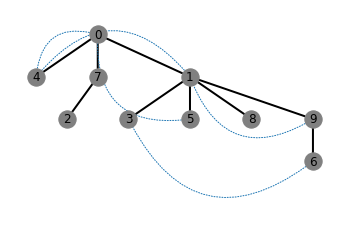

In [2]:
# We can either define a random tree
T = nx.random_tree(10, seed = 1234)

# or we can define a tree from an edgeset
edgeset = [(0, 4), (0, 7), (0, 1), (1, 3), (1, 5), (1, 8), (1, 9), (2, 7), (6, 9)]
T = nx.Graph(edgeset)

# we can generate a set of links using the generate_random_links_by_type function defined in tree_augmentation.general
# we can also define what type of links to include (c = crosslinks, i = inlinks, u = uplinks).
L = generate_random_links_by_type(tree = T, root = 0, types_to_include = ['c', 'i', 'u'], number_links = 5, seed = 4321)

# we can draw a tree using the draw_tree function defined in tree_augmentation.general
draw_tree(tree = T, root = 0, links = L)

In all numerical simulations, we generate the same instances in order to get comparable results. Once we specify a tree size `n`, the parameter `factor` that controls the size of the link set, and the random seed `seed`, we get a unique TAP instance.

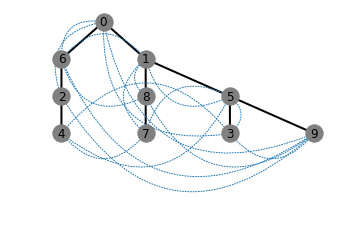

In [3]:
T, L = get_instance(n = 10, factor = 2, seed = 7)
draw_tree(tree = T, root = 0, links = L)

All functions defined in `tree_augmentation` have a docstring. We can hence ask for help whenever needed.

In [4]:
get_instance?

### Natural LP
The following function allows us to solve the natural LP relaxation. If we specify `variable_type = GRB.BINARY`, then the integer IP is solved (i.e. we obtain the exact solution), and if `variable_type = GRB.CONTINUOUS` is specified, then we compute the natural LP relaxation.

In [5]:
solve_naturalLP(tree = T, links = L, link_weights = None, variable_type = GRB.CONTINUOUS)

{'lp_status': 'opt',
 'optimal_solution': [0.0,
  0.0,
  0.3333333333333333,
  0.0,
  0.0,
  0.0,
  0.0,
  0.3333333333333333,
  0.0,
  0.6666666666666667,
  0.0,
  0.0,
  0.0,
  0.6666666666666667,
  0.3333333333333333,
  0.0,
  0.0,
  0.0],
 'optimal_obj_value': 2.3333333333333335}

### Solve using approximation algorithms
Below we show how to solve the TAP using the approximation algorithms defined. Note that we have to add the following prefixes to our functions:
- `nrd.` for the naive rounding procedure
- `ird.` for the iterative roudning procedure
- `upl.` for the approximation via uplinks
- `mat.` fot the approximation using the matching heuristic.

In [12]:
# solve via naive rounding
sol_nrd = nrd.approximation_via_naiveRounding(tree = T, links = L, link_weights = None)

# solve via iterative rounding
sol_ird = ird.approximation_via_iterativeRounding(tree = T, links = L, link_weights = None)

# solve via uplinks
sol_upl = upl.approximation_via_uplinks(tree = T, root = 0, links = L, link_weights = None)

# solve via matching heuristic
sol_mat = mat.approximation_via_matchingHeuristic(
    tree = T, links = L, matching_procedure = 'max_weight', leaf_nonleaf_selection = 'greedy'
)

print(sol_mat)

{'status': 'opt', 'optimal_solution': [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], 'optimal_obj_value': 3, 'selected_in_order': [(4, 7), (3, 9), (0, 3)], 'selected_links_orig_form': [(4, 7), (3, 9), (2, 9)]}


We can also retrieve the approximation ratios of the approximation algorithms for a set of samples, e.g. here is the result for the matching heuristic (similar functions are defined for the other approximation algorithms). Note that whenever we run the function, the output is saved in the `saved_outputs` file. Thus, if the cell is run again, the output should appear immediately. Notice that whenever an instance is infeasible, the entry in the approximation ratios array is `nan`.

In [13]:
mat.get_approximation_ratios_of_matchingHeuristic_approximation(
    matching_procedure = 'max_weight', 
    leaf_nonleaf_selection = 'greedy', 
    samples = 20, 
    n = 10, 
    factor = 2, 
    output_directory = 'saved_outputs'
)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

### Comparing algorithms

When we wish to compare a set of algorithms, for a specific TAP instance, we can use the following:

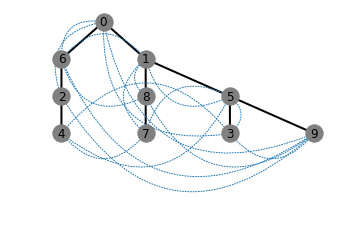

,algorithm,value,"(1, 7)","(2, 9)","(3, 4)","(0, 9)","(1, 5)","(0, 3)","(0, 6)","(6, 9)","(1, 8)","(4, 7)","(1, 6)","(3, 5)","(0, 2)","(3, 9)","(5, 7)","(8, 9)","(6, 8)","(4, 5)"
0,natural LP relaxation,2.333333,,,0.333333,,,,,0.333333,,0.666667,,,,0.666667,0.333333,,,
1,exact,3.000000,,,,,,,,,,1.000000,,,,1.0,1.0,,,
2,uplinks,3.000000,,,1.0,1.0,,,,,,1.000000,,,,,,,,
3,naive rounding,5.000000,,,1.0,,,,,1.0,,1.000000,,,,1.0,1.0,,,
4,iterative rounding,3.000000,,,1.0,,,,,,,1.000000,,,,1.0,,,,
5,matching heuristic B,3.000000,,1.0,,,,,,,,1.000000,,,,1.0,,,,
6,matching heuristic WG,3.000000,,1.0,,,,,,,,1.000000,,,,1.0,,,,
7,matching heuristic WM,3.000000,,1.0,,,,,,,,1.000000,,,,1.0,,,,
8,matching heuristic RG,3.000000,,1.0,,,,,,,,1.000000,,,,1.0,,,,
9,matching heuristic RM,3.000000,,1.0,,,,,,,,1.000000,,,,1.0,,,,


In [14]:
compare_outputs(
    T = T, 
    links = L, 
    root = 0, 
    algorithms_to_compare = ['NLP', 'EXT', 'UPL', 'NRD', 'IRD', 'MAT_B', 'MAT_WG', 'MAT_WM', 'MAT_RG', 'MAT_RM']
)

We can also immediately output the result if we happen to know the instance details (tree size `n`, size of link set `factor` and random seed `seed`).

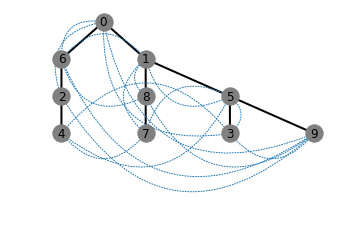

,algorithm,value,"(2, 9)","(3, 4)","(0, 9)","(6, 9)","(4, 7)","(3, 9)","(5, 7)"
0,natural LP relaxation,2.333333,,0.333333,,0.333333,0.666667,0.666667,0.333333
1,exact,3.000000,,,,,1.000000,1.0,1.0
2,uplinks,3.000000,,1.0,1.0,,1.000000,,
3,naive rounding,5.000000,,1.0,,1.0,1.000000,1.0,1.0
4,iterative rounding,3.000000,,1.0,,,1.000000,1.0,
5,matching heuristic B,3.000000,1.0,,,,1.000000,1.0,
6,matching heuristic WG,3.000000,1.0,,,,1.000000,1.0,
7,matching heuristic WM,3.000000,1.0,,,,1.000000,1.0,
8,matching heuristic RG,3.000000,1.0,,,,1.000000,1.0,
9,matching heuristic RM,3.000000,1.0,,,,1.000000,1.0,


In [15]:
solve_instance(
    n = 10, 
    factor = 2, 
    seed = 7, 
    selected_only = True, 
    algorithms_to_compare = ['NLP', 'EXT', 'UPL', 'NRD', 'IRD', 'MAT_B', 'MAT_WG', 'MAT_WM', 'MAT_RG', 'MAT_RM']
)